#Actividad 8


##Importar bibliotecas

In [ ]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp, odeint

In [ ]:
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

##Ejercicio 1:

Resuelva la ecuación diferencial del oscilador de Van der Pol

$$\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}$$
donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

Veamos el sistema lineal de ecuaciones de primer orden

\begin{equation}

\frac{dx}{dt}=v=f_1\\

\frac{d^2x}{dt^2}=\mu(1-x^2)v-x=f_2
\end{equation}

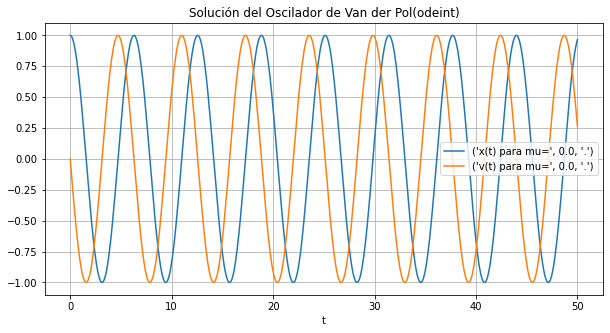

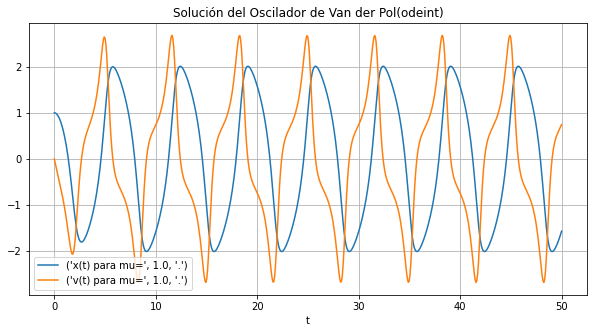

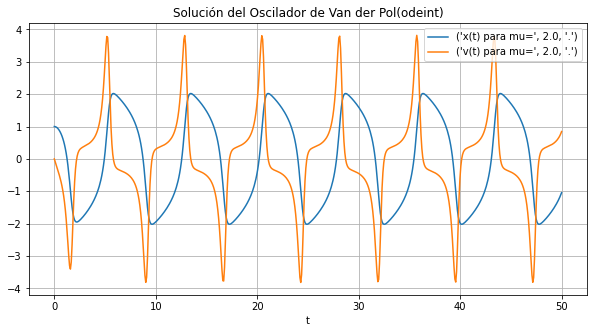

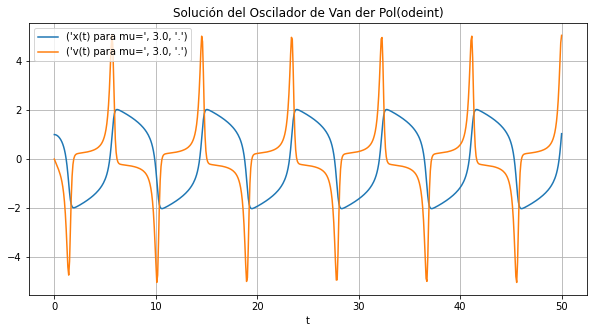

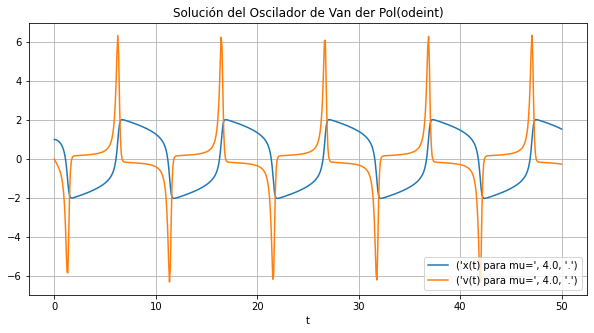

In [ ]:
#Usaremos 'odeint´

#Definimos la funcion F del lado derecho de la ecuacion
def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt
# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=50.0
Npts=600
# Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts)
#print (t)


# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [1.0, 0.0]

#Probemos primero ##########################


# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6


for mu in [0.0,1.0,2.0,3.0,4.0]:
  sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)

#print(sol_mu[:,0],sol_mu[:,1])
# La solución regresa ambas x(t) y v(t)
  y1_mu=sol[:,0]
  y2_mu=sol[:,1]
  plt.figure(figsize=(10,5))
  label_mu='x(t) para mu=',mu,'.'
  label_y2_mu='v(t) para mu=',mu,'.'
  plt.plot(t, y1_mu, label=label_mu)
  plt.plot(t, y2_mu, label=label_y2_mu)
  plt.legend(loc='best')
  plt.title('Solución del Oscilador de Van der Pol(odeint)')
  plt.xlabel('t')
  plt.grid()
  plt.show()

##Ejercicio 2:

Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.

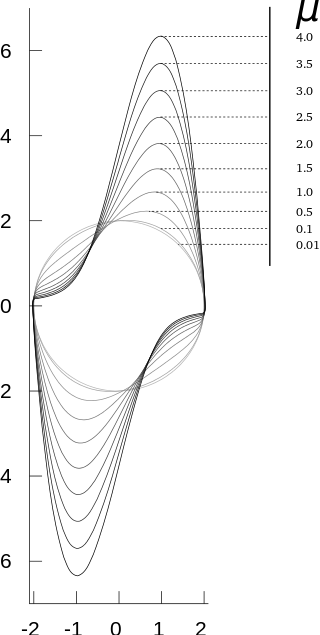

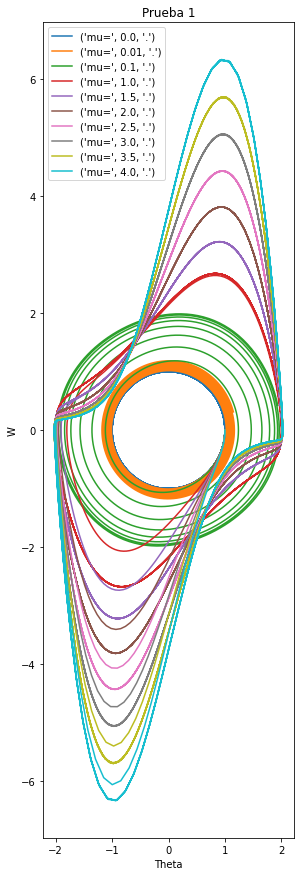

In [ ]:
#Usaremos 'odeint´

#Definimos la funcion F del lado derecho de la ecuacion
def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt
# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=50.0
Npts=2000
# Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts)
#print (t)


# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [1.0, 0.0]

#Probemos primero ##########################


# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6


fig, ax = plt.subplots(figsize=(4.5, 15))
for mu in [0.0,0.01,0.1,1.0,1.5,2.0,2.5,3.0,3.5,4.0]:
  sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)
  y1_mu=sol[:,0]
  y2_mu=sol[:,1]
  label='mu=',mu,'.'
  ax.plot(y1_mu , y2_mu, label=label)
  
ax.set_xlabel('Theta')
ax.set_ylabel('W')
ax.set_title('Prueba 1')
ax.legend(loc='upper left')
ax.legend();

Podemos observar como con los valores para $\mu$ menores que 1 la grafica no coincide con lo teorico que vemos en wikipedia. 

##Ejercicio 3


Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:


*   Método de Euler
*   Método de Runge-Kutta RK4
*   Función scipy.integrate.odeint ó scipy.integrate-solve_ivp



###Ejercicio 3.1




$$\begin{equation*}
\frac{d^2 x}{dt^2} + k(\frac{dx}{dt})^2-g=0 \ , \
  x(0)=0 \ ,\
   \frac{dx}{dt}(0)=0  \ ,\
   k>0
\end{equation*}$$



###Mi desarrollo 
$$\frac{dx}{dt}=v_1=f_1(t)     \ \         (1)\\
\frac{dv_1}{dt}=-k_1(v_1)^2+g=f_2(t)   \ \  (2)$$



$$\frac{d\vec{x}}{dt}=
\begin {matrix}
0&1&0\\
-k_1&0&1\
\end{matrix} \vec{x}=A\vec{x}\\
\vec{x}=\begin{matrix}
x\\
v_1\\
\end{matrix}

$$

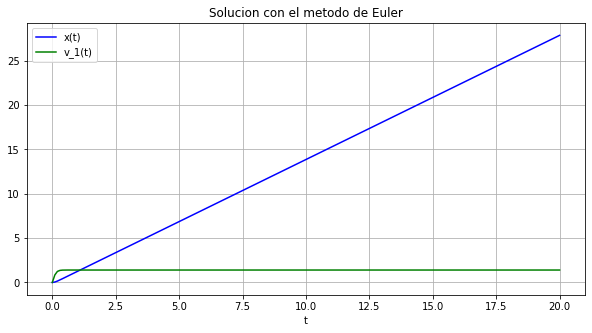

In [ ]:
#from scipy.integrate import odeint
# Definimos la función F(t,y), el lado
# derecho de la ecuacion diferencial
# La solución y es un 
#arreglo 1-D, y=(x, v_1), dy/dt es un arreglo


def f3_1 (x_1, t, k_1, g):
        x , v_1 = x_1
        dxdt = [v_1 , -k_1*(v_1)**2+ g]
        return dxdt

g=9.81
k_1=5
x0_1=[0.0,0.0]
t = np.linspace(0, 20, 201)

x_1 = odeint(f3_1, x0_1, t, args=(k_1,g))

plt.figure(figsize=(10,5))
plt.plot(t, x_1[:, 0], 'b', label='x(t)')
plt.plot(t, x_1[:, 1], 'g', label='v_1(t)')
plt.legend(loc='best')
plt.title('Solucion con el metodo de Euler')
plt.xlabel('t')
plt.grid()
plt.show()

In [ ]:
def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

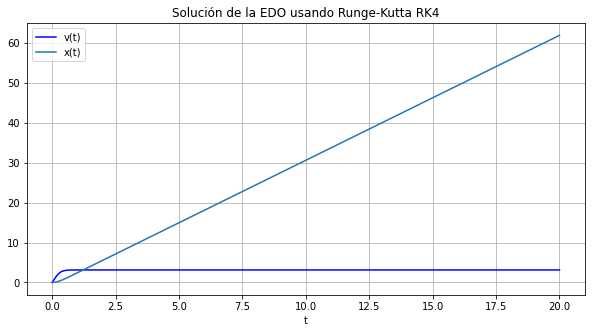

In [ ]:

#Ahora usaremos Runge-Kutta

#Condiciones iniciales
t0_1=0.0
x0_1=0.0
v0_1=0.0

#Constantes
k_1=1 #Igual que el anterior
#g es igual que antes
g=9.81
t = 0
v_1=0


#Paso
a=0.0
b=20
Npts_1=250
h_1=(b-a)/Npts_1



f = lambda t,v: -k_1*v_1**2 + g 

t_values = [t0_1]
v_1_values = [v0_1]



for _ in range(Npts_1):
  t, v_1 = runge_kutta(f, t, v_1, h_1)
  t_values.append(t)
  v_1_values.append(v_1)

#No podemos usar RK4 entonces usare solve_ivp
def f1_2(t,y,k,g):
      dydt = [y[1], -k*(y[1])**2 + g]
      return dydt
#Ya tenemos definido el paso y el intervalo mediante a y b y npts_1
#Tenemos as condiciones inciiales en t
y_0=[x0_1,v0_1]
t1_2=np.linspace(t0_1,b,Npts_1)

#Definimos tolerancia absoluta y relativa
abserr = 1.0e-8
relerr = 1.0e-6
sol = solve_ivp(lambda t, y, mu: f1_2(t, y, k_1, g),(t0_1,b), y0=y_0, 
                method='RK45', t_eval=t1_2, args=(mu,), rtol=relerr, atol=abserr)
x1_2=sol.y[0]


plt.figure(figsize=(10,5))
plt.plot(t_values, v_1_values, 'b', label='v(t)')
plt.plot(t1_2,x1_2,label='x(t)')
plt.legend(loc='best')
plt.title('Solución de la EDO usando Runge-Kutta RK4')
plt.xlabel('t')
plt.grid()
plt.show()



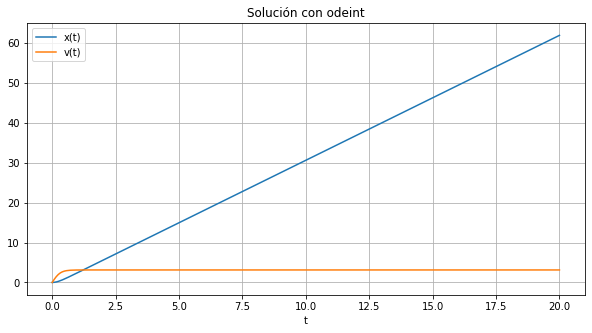

In [22]:
#Ahora usaremos odeint
#Ya tenemos definido el tiempo inicial de t0_1 y b y el paso mediante
#Npts_1
#Tenemos definido t tambien 

#Condiciones iniciales
x0_1=0.0 #Ya estaba definido pero lo volvemos a hacer
a0_1=[0.0,0.0]

#Tenemos definidas las tolerancia absoluta y relativa 
sol=odeint(f3_1,a0_1,t1_2,args=(k_1,g),atol=abserr,rtol=relerr)
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(t1_2, y1, label='x(t)')
plt.plot(t1_2, y2, label='v(t)')
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()


Vemos que en esta la funcion x(t) empieza en 1

###Ejercicio 3.2:

$$\begin{equation*}
\frac{d^2 y}{dx^2} + \frac{2}{x} \frac{dy}{dx}+y^5=0 \ , \
  y(0)=1 \ ,\
   \frac{dy}{dx}(0)=0  
\end{equation*}$$

\begin{equation}
\frac{dy}{dx}=v
\\
\frac{d^2y}{dx^2}=a=-\frac{2}{x}v-y^5
\end{equation}

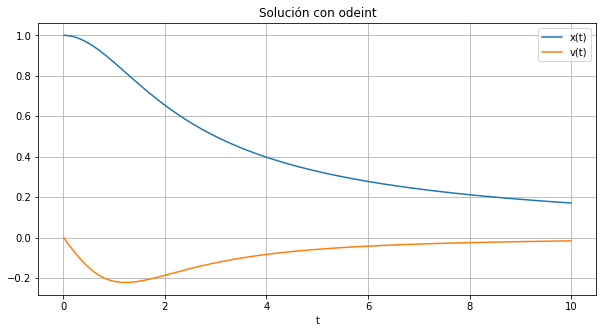

In [ ]:
#Utilizaremps odeint
def f3_2(a,x):
  y , v = a
  dadx = [v, (-2/x)*v-y**5]
  return dadx

#Condiciones iniciales
x0_32=0.1  #No puede ser 0 ya que dividimos entre eso
y0_32=1.0
v0_32=0.0

a0_32=[y0_32,v0_32]

x_32=np.linspace(0.01,10.00,200)
#Ya hemos definido la tolerancia absoluta y la relativa
sol_32=odeint( f3_2, a0_32, x_32, atol=abserr, rtol=relerr)

y1_32=sol_32[:,0]
y2_32=sol_32[:,1]


plt.figure(figsize=(10,5))
plt.plot(x_32, y1_32, label='x(t)')
plt.plot(x_32, y2_32, label='v(t)')
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()


###Ejercicio 3.3:
$$\begin{equation*}
\frac{d^3 y}{dx^3} = (x-1)^2+y^2+\frac{dy}{dx}-2 \ , \ y(0)=1,y'(0)=0 \ , \ y''(0)=2
\end{equation*}$$

\begin{equation}
\frac{dy}{dx}=v=f_1(x)
\\ \frac{dv}{dx}=a=f_2(x)
\\ \frac{da}{dx}=(x-1)^2+y^2+v-2=f_3(x)
\end{equation}

Que se puede escribir como 
\begin{equation}
\frac{d}{dx}\vec{c}=\vec{f}(x,\vec{c})=(f_1(x),f_2(x),f_3(x))
\end{equation}
entonces
\begin{equation}
\vec{c}=
\begin{matrix}
y \\
v\\
a\\
\end{matrix}
\end{equation}

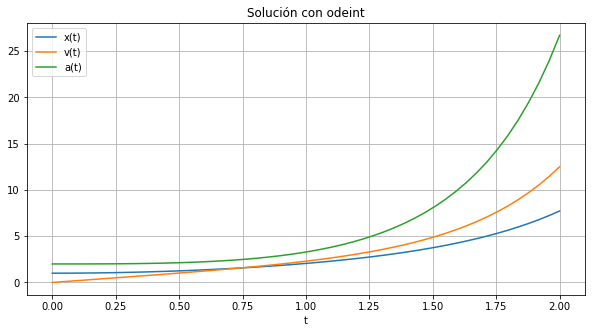

In [ ]:
#La resolvemos por odeint 

def f3_3(c, x):
        y, v, a = c
        dcdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dcdx

#condiciones iniciales

x0_33 = 0.0
y0_33 = 1.0
v0_33 = 0.0
a0_33 = 2.0
x_33 = np.linspace(0.0, 2.0, 50)

a03_3 = [y0_33, v0_33, a0_33]

#Ya tenemos los errores de tolerancia definidos en 
#abserr y relerr 

sol_33=odeint(f3_3, a03_3, x_33, atol=abserr, rtol=relerr)

# La solución regresa ambas x(t) y v(t)
y1_33=sol_33[:,0]
y2_33=sol_33[:,1]
y3_33=sol_33[:,2]

plt.figure(figsize=(10,5))
plt.plot(x_33, y1_33, label='x(t)')
plt.plot(x_33, y2_33, label='v(t)')
plt.plot(x_33, y3_33, label='a(t)')
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()